## Lectura Rhode Island

Lectura de los archivos de reviews de Rhode Island

In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de Rhode Island. Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Rhode_Island/1.json', lines= True)
df_2 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Rhode_Island/2.json', lines= True)
df_3 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Rhode_Island/3.json', lines= True)
df_4 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Rhode_Island/4.json', lines= True)
df_5 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Rhode_Island/5.json', lines= True)
df_6 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Rhode_Island/6.json', lines= True)


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encou

In [4]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 7):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_Rhode_Island = pd.concat(dfs, ignore_index=True)

In [5]:
# Vista primeros registros

reviews_Rhode_Island.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.079069e+20,Rubia Bella,1601590520320,5,Very good! Will eat here again! ☺️😍,None,"{'time': 1602371857761, 'text': 'Hope to see y...",0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737
1,1.167350e+20,angel olivencia,1602983693555,4,Not bad place... good food,None,None,0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737
2,1.057469e+20,Daniel Reggiani,1603064156784,5,Really good food,None,None,0x89e44fe1c2a2a2c3:0x5fc9f6751fb29737


In [6]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_Rhode_Island.shape

(890006, 8)

In [7]:
# Miro el tipo de información

reviews_Rhode_Island.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890006 entries, 0 to 890005
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  890006 non-null  float64
 1   name     890006 non-null  object 
 2   time     890006 non-null  int64  
 3   rating   890006 non-null  int64  
 4   text     464261 non-null  object 
 5   pics     22547 non-null   object 
 6   resp     77022 non-null   object 
 7   gmap_id  890006 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 54.3+ MB


In [8]:
# Checkeo de nulos y su porcentaje

nulls = pd.DataFrame(reviews_Rhode_Island.isnull().sum().sort_values(ascending = False))
nulls["Porcentaje de nulos"] = round(nulls/reviews_Rhode_Island.shape[0]*100,2)
nulls.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,867459,97.47
resp,812984,91.35
text,425745,47.84
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [9]:
reviews_Rhode_Island.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [10]:
reviews_Rhode_Island.user_id.nunique()

32897

En el estado de Rhode Island, tenemos 32897 usuarios que emitieron 890 K de reseñas.

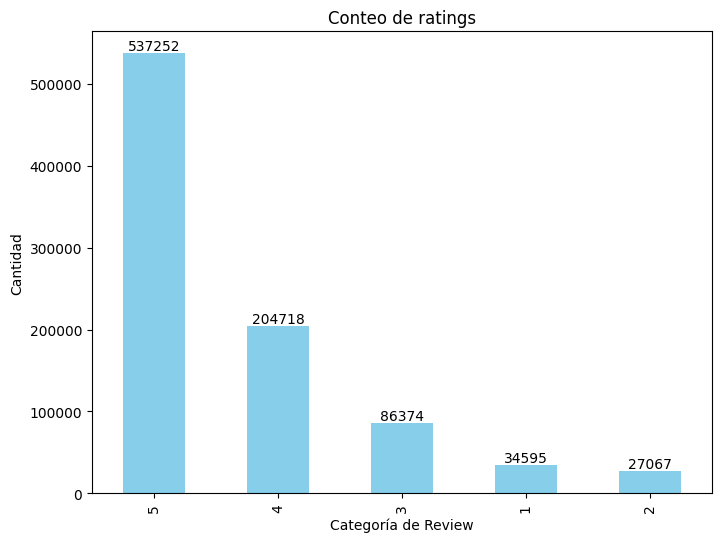

In [11]:
rating = reviews_Rhode_Island.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [12]:
reviews_Rhode_Island['time'] = pd.to_datetime(reviews_Rhode_Island['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [13]:
reviews_Rhode_Island['time'] = pd.to_datetime(reviews_Rhode_Island['time'], format='%d/%m/%Y')

reviews_Rhode_Island['year'] = reviews_Rhode_Island['time'].dt.year

In [14]:
min_date = reviews_Rhode_Island.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2008-01-17 00:00:00
2008-01-17 00:00:00


In [15]:
max_date = reviews_Rhode_Island.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-02 00:00:00
2021-09-02 00:00:00


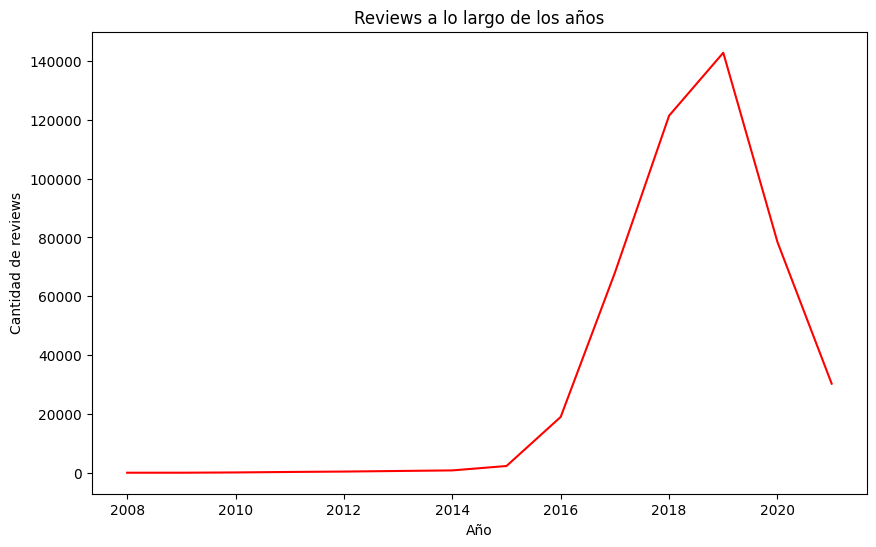

In [16]:
conteo_por_año= reviews_Rhode_Island[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [17]:
reviews_Rhode_Island["text"] = reviews_Rhode_Island["text"].astype(str)
reviews_Rhode_Island.dropna(subset=["text"], inplace=True)

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


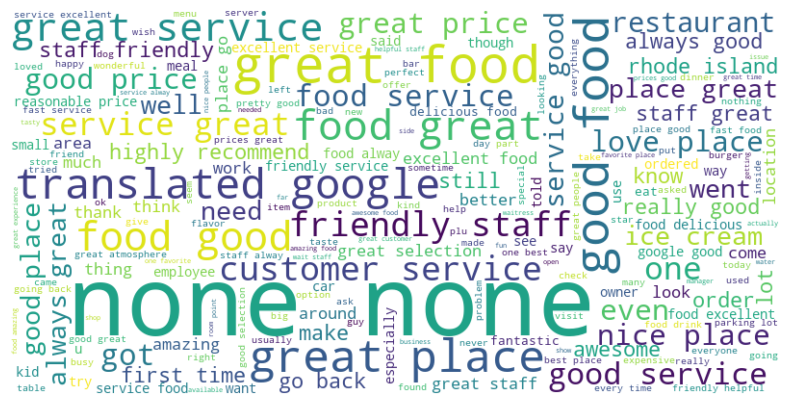

In [19]:
# Assuming you have a DataFrame named "reviews_XXXXXXXXXXXXXXXXXX" with a "text" column
texto = " ".join(reviews_Rhode_Island["text"])

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and removing stopwords
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the words into a text string
texto_procesado = " ".join(words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
